In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/AI_index_db.csv')

In [2]:
#RANGE

import pandas as pd

def calculate_range_from_csv(file_path, column_name):

    #Calculate the range of a specified column in a CSV file.

    #Parameters:
    #file_path (str): Path to the CSV file.
    #column_name (str): Name of the column for which to calculate the range.

    #Returns:
    #float: The range of the column data.

    try:
        # Load the dataset
        data = pd.read_csv(file_path)

        # Ensure the column exists
        if column_name not in data.columns:
            raise ValueError(f"Column '{column_name}' does not exist in the dataset.")

        # Drop NaN values in the column
        column_data = data[column_name].dropna()

        # Calculate and return the range
        return column_data.max() - column_data.min()

    except Exception as e:
        print(f"Error: {e}")
        return None

# Example usage
file_path = "/content/AI_index_db.csv"  # Replace with the path to your dataset
column_name = "Total score"  # Replace with the column you want to analyze

result = calculate_range_from_csv(file_path, column_name)
if result is not None:
    print(f"The range of the '{column_name}' column is: {result} ")

The range of the 'Total score' column is: 100.0 


In [ ]:
# Drop missing values in the 'Total score' column
total_score = df['Total score'].dropna()

# Define class intervals (10 bins as an example)
num_bins = 10
min_val = total_score.min()
max_val = total_score.max()
bin_width = (max_val - min_val) / num_bins
bins = pd.interval_range(start=min_val, end=max_val, freq=bin_width)

# Group the data into intervals and calculate frequency
frequency_distribution = pd.cut(total_score, bins=bins).value_counts().sort_index()

# Calculate midpoints and cumulative frequency
midpoints = [(interval.left + interval.right) / 2 for interval in frequency_distribution.index]
cumulative_frequency = frequency_distribution.cumsum()

# Create a DataFrame for display
freq_table = pd.DataFrame({
    'Total Scores': [str(interval) for interval in frequency_distribution.index],  # Updated column name
    'Midpoint': midpoints,
    'Frequency': frequency_distribution.values,
    'Cumulative Frequency': cumulative_frequency.values
})

# Display the result
freq_table


,Total Scores,Midpoint,Frequency,Cumulative Frequency
0,"(0.0, 10.0]",5.0,8,8
1,"(10.0, 20.0]",15.0,17,25
2,"(20.0, 30.0]",25.0,18,43
3,"(30.0, 40.0]",35.0,14,57
4,"(40.0, 50.0]",45.0,2,59
5,"(50.0, 60.0]",55.0,0,59
6,"(60.0, 70.0]",65.0,1,60
7,"(70.0, 80.0]",75.0,0,60
8,"(80.0, 90.0]",85.0,0,60
9,"(90.0, 100.0]",95.0,1,61


In [ ]:
# Calculate mean
freq_table['Product'] = freq_table['Midpoint'] * freq_table['Frequency']
mean = freq_table['Product'].sum() / freq_table['Frequency'].sum()
print(f"Mean: {mean}")


#Calculate median
N = freq_table['Frequency'].sum()
median_class = freq_table[freq_table['Cumulative Frequency'] >= N/2].iloc[0]
l = median_class['Midpoint'] - 5 # assuming class width is 10
cf = median_class['Cumulative Frequency'] - median_class['Frequency']
f = median_class['Frequency']
median = l + ((N/2 - cf)/f)*10
print(f"Median: {median}")

# Calculate mode
mode_class = freq_table[freq_table['Frequency'] == freq_table['Frequency'].max()].iloc[0]
l = mode_class['Midpoint'] - 5 # assuming class width is 10
delta1 = mode_class['Frequency'] - freq_table['Frequency'][freq_table.index[freq_table['Midpoint'].values == mode_class['Midpoint']]-1].values[0]
delta2 = mode_class['Frequency'] - freq_table['Frequency'][freq_table.index[freq_table['Midpoint'].values == mode_class['Midpoint']]+1].values[0]
mode = l + ((delta1)/(delta1+delta2))*10
print(f"Mode: {mode}")


# Calculate Harmonic Mean
freq_table['HM_temp'] = freq_table['Frequency'] / freq_table['Midpoint']
harmonic_mean = freq_table['Frequency'].sum()/freq_table['HM_temp'].sum()
print(f"Harmonic Mean: {harmonic_mean}")


# Calculate Geometric Mean
freq_table['GM_temp'] = freq_table['Frequency'] * np.log(freq_table['Midpoint'])
geometric_mean = np.exp(freq_table['GM_temp'].sum()/freq_table['Frequency'].sum())
print(f"Geometric Mean: {geometric_mean}")

Mean: 24.34426229508197
Median: 23.055555555555557
Mode: 22.0
Harmonic Mean: 15.546595187540987
Geometric Mean: 20.075195063444877


In [ ]:
# Quartiles, Percentiles, and Deciles for Grouped Data
def calculate_grouped_position(freq_table, position):
    N = freq_table['Frequency'].sum()
    position_value = position * N
    cumulative_freq = freq_table['Cumulative Frequency']
    target_class_index = (cumulative_freq >= position_value).idxmax()

    target_class = cumulative_freq.index[target_class_index]
    l = freq_table['Midpoint'][target_class_index] - 5  # Assuming class width 10
    f = freq_table['Frequency'][target_class_index]
    cf = cumulative_freq.iloc[target_class_index - 1] if target_class_index > 0 else 0
    h = 10  # Class width

    value = l + ((position_value - cf) / f) * h
    return value

# Quartiles
Q1 = calculate_grouped_position(freq_table, 0.25)
Q2 = calculate_grouped_position(freq_table, 0.5)
Q3 = calculate_grouped_position(freq_table, 0.75)

print(f"Q1 (1st Quartile): {Q1}")
print(f"Q2 (Median/2nd Quartile): {Q2}")
print(f"Q3 (3rd Quartile): {Q3}")

# Percentiles (Example: 10th and 90th)
P10 = calculate_grouped_position(freq_table, 0.10)
P90 = calculate_grouped_position(freq_table, 0.90)

print(f"P10 (10th Percentile): {P10}")
print(f"P90 (90th Percentile): {P90}")

# Deciles (Example: D3 and D7)
D3 = calculate_grouped_position(freq_table, 0.3)
D7 = calculate_grouped_position(freq_table, 0.7)

print(f"D3 (3rd Decile): {D3}")
print(f"D7 (7th Decile): {D7}")

Q1 (1st Quartile): 14.264705882352942
Q2 (Median/2nd Quartile): 23.055555555555557
Q3 (3rd Quartile): 31.964285714285715
P10 (10th Percentile): 7.625000000000001
P90 (90th Percentile): 38.5
D3 (3rd Decile): 16.058823529411764
D7 (7th Decile): 29.83333333333333


In [ ]:
# Variance and Standard Deviation
freq_table['Squared Deviation'] = ((freq_table['Midpoint'] - mean) ** 2) * freq_table['Frequency']
variance = freq_table['Squared Deviation'].sum() / freq_table['Frequency'].sum()
std_deviation = np.sqrt(variance)

# Mean Deviation
freq_table['Absolute Deviation'] = abs(freq_table['Midpoint'] - mean) * freq_table['Frequency']
mean_deviation = freq_table['Absolute Deviation'].sum() / freq_table['Frequency'].sum()

# Calculate Q1 and Q3
Q1 = calculate_grouped_position(freq_table, 0.25)
Q3 = calculate_grouped_position(freq_table, 0.75)
quartile_deviation = (Q3 - Q1) / 2

#Coefficients
coefficient_quartile_deviation = quartile_deviation / ((Q3 + Q1) / 2)
coefficient_variance = variance / mean**2
coefficient_std_deviation = std_deviation / mean
coefficient_mean_deviation = mean_deviation / mean

# Display Results
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_deviation}")
print(f"Mean Deviation: {mean_deviation}")
print(f"Quartile Deviation: {quartile_deviation}")

print(f"Coefficient of Quartile Deviation: {coefficient_quartile_deviation}")
print(f"Coefficient of Variance: {coefficient_variance}")
print(f"Coefficient of Standard Deviation: {coefficient_std_deviation}")
print(f"Coefficient of Mean Deviation: {coefficient_mean_deviation}")

Mean: 24.34426229508197
Variance: 222.52082773447998
Standard Deviation: 14.917132021085017
Mean Deviation: 10.28218220908358
Quartile Deviation: 8.849789915966387
Coefficient of Quartile Deviation: 0.3828675301067939
Coefficient of Variance: 0.37547189062340575
Coefficient of Standard Deviation: 0.6127576116405293
Coefficient of Mean Deviation: 0.4223657338411437


In [ ]:
# Karl Pearson's Skewness
karl_pearson_skewness = (mean - mode) / std_deviation

# Bowley's Skewness
def calculate_grouped_position(freq_table, position):
    N = freq_table['Frequency'].sum()
    position_value = position * N
    cumulative_freq = freq_table['Frequency'].cumsum()
    target_class_index = (cumulative_freq >= position_value).idxmax()

    L = freq_table['Midpoint'][target_class_index] - bin_width / 2  # Lower boundary
    f = freq_table['Frequency'][target_class_index]
    cf = cumulative_freq.iloc[target_class_index - 1] if target_class_index > 0 else 0
    h = bin_width  # Class width

    value = L + ((position_value - cf) / f) * h
    return value

Q1 = calculate_grouped_position(freq_table, 0.25)
Q3 = calculate_grouped_position(freq_table, 0.75)
bowleys_skewness = (Q3 - 2 * median + Q1) / (Q3 - Q1)


# Kurtosis
freq_table['Fourth Deviation'] = ((freq_table['Midpoint'] - mean) ** 4) * freq_table['Frequency']
fourth_moment = freq_table['Fourth Deviation'].sum() / freq_table['Frequency'].sum()
kurtosis = fourth_moment / (std_deviation ** 4)

print(f"Karl Pearson's Skewness: {karl_pearson_skewness}")
print(f"Bowley's Skewness: {bowleys_skewness}")
print(f"Kurtosis: {kurtosis}")

Karl Pearson's Skewness: 0.15715234615932933
Bowley's Skewness: 0.006660072535443381
Kurtosis: 9.749824266610661


In [ ]:
# Moments about Origin
def calculate_moments_origin(freq_table, k):
    moment = sum(f * (x ** k) for x, f in zip(freq_table['Midpoint'], freq_table['Frequency'])) / sum(freq_table['Frequency'])
    return moment

# Moments about the Mean
def calculate_moments_mean(freq_table, mean, k):
    moment = sum(f * ((x - mean) ** k) for x, f in zip(freq_table['Midpoint'], freq_table['Frequency'])) / sum(freq_table['Frequency'])
    return moment

# Moments about Arbitrary Origin (a)
def calculate_moments_arbitrary_origin(freq_table, a, k):
    moment = sum(f * ((x - a) ** k) for x, f in zip(freq_table['Midpoint'], freq_table['Frequency'])) / sum(freq_table['Frequency'])
    return moment

# Calculate Moments
a = 20  # Arbitrary origin (example)
moments_about_origin = [calculate_moments_origin(freq_table, k) for k in range(1, 5)]
moments_about_mean = [calculate_moments_mean(freq_table, mean, k) for k in range(1, 5)]
moments_about_arbitrary = [calculate_moments_arbitrary_origin(freq_table, a, k) for k in range(1, 5)]

# Display Results
print("Moments about the Origin:")
for i, moment in enumerate(moments_about_origin, start=1):
    print(f"  Moment {i}: {moment:.4f}")

print("\nMoments about the Mean:")
for i, moment in enumerate(moments_about_mean, start=1):
    print(f"  Moment {i}: {moment:.4f}")

print(f"\nMoments about Arbitrary Origin (a = {a}):")
for i, moment in enumerate(moments_about_arbitrary, start=1):
    print(f"  Moment {i}: {moment:.4f}")


Moments about the Origin:
  Moment 1: 24.3443
  Moment 2: 815.1639
  Moment 3: 36952.8689
  Moment 4: 2236198.7705

Moments about the Mean:
  Moment 1: -0.0000
  Moment 2: 222.5208
  Moment 3: 6274.0934
  Moment 4: 482767.6065

Moments about Arbitrary Origin (a = 20):
  Moment 1: 4.3443
  Moment 2: 241.3934
  Moment 3: 9256.1475
  Moment 4: 617346.3115


In [ ]:
moment_2 = calculate_moments_mean(freq_table, mean, 2)
moment_3 = calculate_moments_mean(freq_table, mean, 3)
moment_4 = calculate_moments_mean(freq_table, mean, 4)

# Calculate b1 (Skewness) and b2 (Kurtosis)
B1 = (moment_3 ** 2) / (moment_2 ** 3)
B2 = moment_4 / (moment_2 ** 2)

print(f"B1 (Coefficient of Skewness): {B1}")
print(f"B2 (Coefficient of Kurtosis): {B2}")

B1 (Coefficient of Skewness): 3.572645809044299
B2 (Coefficient of Kurtosis): 9.74982426661066


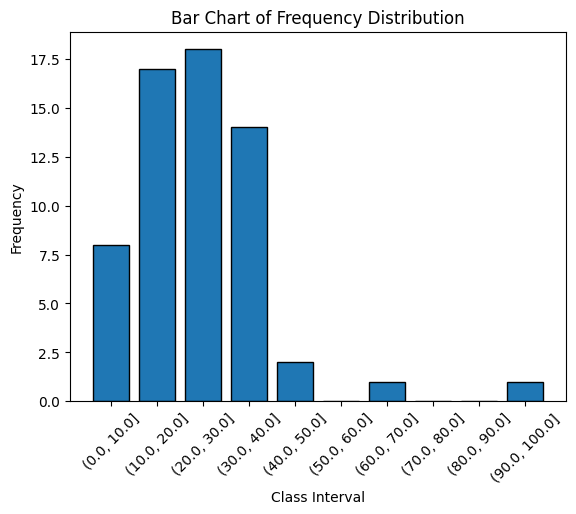

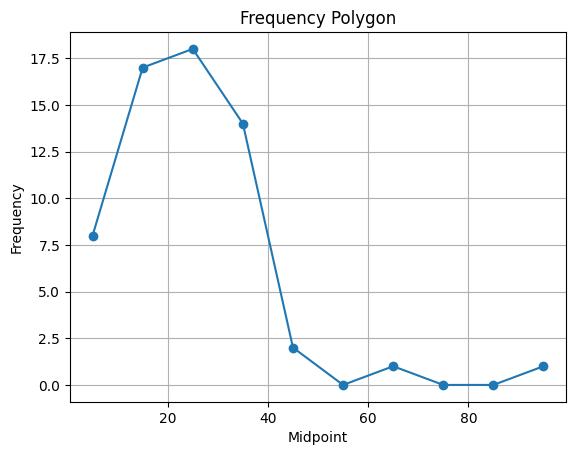

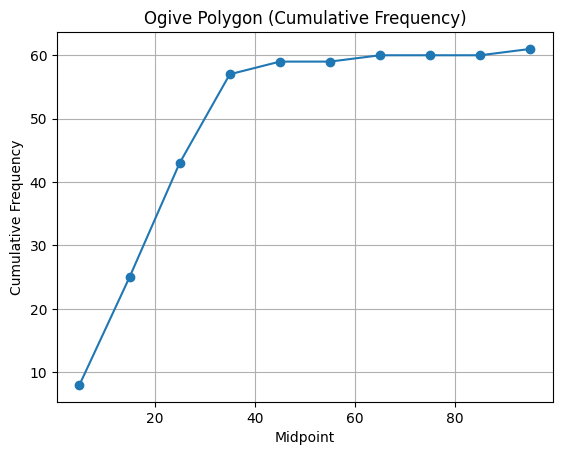

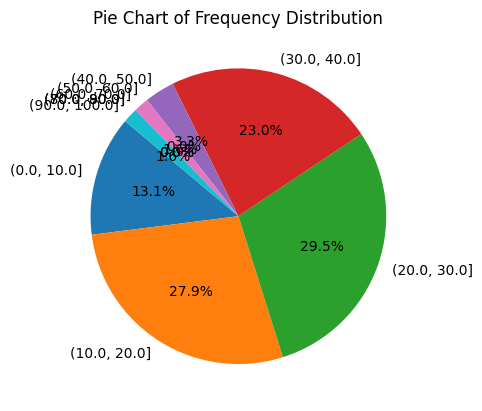

In [ ]:
# 1. Bar Chart
plt.bar(freq_table['Total Scores'], freq_table['Frequency'], edgecolor='black')
plt.xticks(rotation=45)
plt.title("Bar Chart of Frequency Distribution")
plt.xlabel("Class Interval")
plt.ylabel("Frequency")
plt.show()

# 2. Frequency Polygon
plt.plot(freq_table['Midpoint'], freq_table['Frequency'], marker='o', linestyle='-', label="Frequency Polygon")
plt.title("Frequency Polygon")
plt.xlabel("Midpoint")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# 3. Ogive Polygon (Cumulative Frequency Curve)
plt.plot(freq_table['Midpoint'], cumulative_frequency, marker='o', linestyle='-', label="Ogive Polygon")
plt.title("Ogive Polygon (Cumulative Frequency)")
plt.xlabel("Midpoint")
plt.ylabel("Cumulative Frequency")
plt.grid()
plt.show()

# 4. Pie Chart
plt.pie(freq_table['Frequency'], labels=freq_table['Total Scores'], autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Frequency Distribution")
plt.show()